In [3]:
# system libraries
import os
import warnings
  
# ignoring all the warnings
warnings.simplefilter('ignore')
  
# import data handling libraries
import numpy as np
import pandas as pd
  
# importing data visualisation libraires
import matplotlib.pyplot as plt 
%matplotlib inline
  
# import image processing library
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2grey

In [6]:
train_csv_path = "~/Downloads/CheXpert-v1.0-small/train.csv"
train_df = pd.read_csv(train_csv_path)

In [7]:
train_df.head(3)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [9]:
base_path = "~/Downloads"
label_name = "Cardiomegaly"

In [70]:
def read_image_and_label(df, label_name):
    images = []
    labels = []
    for i in range(len(df)):
        img = imread(os.path.join(base_path, df.loc[i, "Path"]))
        label = df.loc[i, label_name]
        images.append(img)
        labels.append(label)
    return images, labels
        

In [71]:
images, labels = read_image_and_label(train_df.head(10), label_name)

In [72]:
images[0].shape

(320, 389)

In [83]:
images[0]

array([[  1,   0,  49, ...,   0,   0,   0],
       [  3,   1,  50, ...,   1,   1,   1],
       [  0,   0,  49, ...,   0,   0,   0],
       ...,
       [157, 167, 178, ..., 226, 229, 238],
       [165, 172, 164, ..., 255, 234, 240],
       [176, 198, 163, ..., 245, 232, 230]], dtype=uint8)

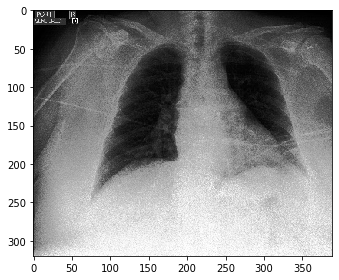

In [73]:
imshow(images[0])

In [80]:
new_img = resize(images[0], (320, 320))

In [85]:
new_img

array([[3.49877451e-03, 6.21507353e-02, 1.92156863e-01, ...,
        1.11457684e-16, 1.11457684e-16, 1.11457684e-16],
       [1.09191176e-02, 6.60723039e-02, 1.96078431e-01, ...,
        3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.05490927e-16, 6.21507353e-02, 1.98498775e-01, ...,
        2.11397059e-03, 1.09716158e-16, 1.09716158e-16],
       ...,
       [6.19914216e-01, 6.68854167e-01, 6.76899510e-01, ...,
        9.22212010e-01, 8.94234069e-01, 9.29528186e-01],
       [6.50018382e-01, 6.64362745e-01, 6.57935049e-01, ...,
        9.87316176e-01, 9.44283088e-01, 9.38639706e-01],
       [6.99497549e-01, 7.32077206e-01, 6.75153186e-01, ...,
        9.54442402e-01, 9.26292892e-01, 9.02806373e-01]])

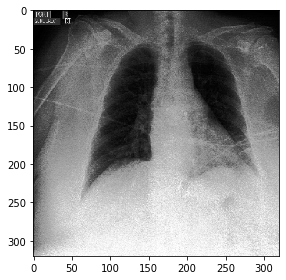

In [86]:
imshow(new_image)

In [74]:
#  Flattening and Reshaping the data.
def resize_and_flatten(images, size=(320, 320)):
    result = []
    for img in images:
        new_img = resize(img, size)
        flatted = np.ndarray.flatten(new_img)
        result.append(flatted)
    return result

In [75]:
flat_images = resize_and_flatten(images)

In [79]:
df

,0,1,2,3,4,5,6,7,8,9,...,102390,102391,102392,102393,102394,102395,102396,102397,102398,102399
0,0.003499,6.215074e-02,0.192157,0.198076,0.184779,0.194620,0.188235,0.193076,0.202610,0.185263,...,0.980895,0.943082,0.848897,0.923701,0.986777,0.943002,0.892788,0.954442,0.926293,0.902806
1,0.080637,7.052696e-02,0.082721,0.068260,0.066605,0.051042,0.069975,0.066973,0.076225,0.069975,...,0.411458,0.405576,0.422733,0.428493,0.411029,0.419914,0.444730,0.464522,0.456127,0.475429
2,0.048775,6.917892e-02,0.073775,0.078676,0.093934,0.120221,0.227757,0.313113,0.321569,0.336336,...,0.365012,0.361887,0.364400,0.363664,0.365502,0.364890,0.373713,0.362929,0.366054,0.347672
3,0.840993,7.504289e-01,0.702880,0.656679,0.669792,0.683762,0.651042,0.628860,0.622304,0.562071,...,0.179534,0.176471,0.179963,0.183456,0.183885,0.176471,0.176471,0.157292,0.161213,0.569485
4,0.006985,5.938605e-16,0.004289,0.013848,0.004105,0.003186,0.012377,0.005331,0.010662,0.011152,...,0.004841,0.028615,0.007537,0.006801,0.018015,0.027206,0.014522,0.037745,0.070711,0.085417
5,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.401520,3.779902e-01,0.365925,0.358082,0.346317,0.338174,0.334252,0.333952,0.327310,0.311624,...,0.363205,0.359283,0.359283,0.363505,0.371048,0.382212,0.386434,0.383413,0.391556,0.407243
7,0.031373,3.137255e-02,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.035282,0.035282,...,0.035270,0.039191,0.039191,0.039191,0.039191,0.039191,0.039191,0.039191,0.039191,0.039191
8,0.097402,1.013235e-01,0.101324,0.097721,0.094118,0.097721,0.097721,0.097402,0.097721,0.097721,...,0.112770,0.112770,0.119657,0.119975,0.123260,0.123260,0.119657,0.116373,0.116691,0.123897
9,0.113725,1.137255e-01,0.113725,0.110723,0.109804,0.109804,0.108150,0.105882,0.105882,0.105882,...,0.022978,0.005576,0.031189,0.042953,0.031373,0.015870,0.030208,0.030331,0.019608,0.026593


In [67]:
pd.DataFrame(flatten_image_and_labels[0])

TypeError: 'numpy.float64' object is not iterable

In [87]:
def create_dataframe(images, labels):
    df1 = pd.DataFrame(images)
    df2 = pd.DataFrame(labels, columns=["label"])
    return pd.concat(df1, df2)


In [89]:
pd.DataFrame(labels, columns=["label"])

,label
0,NaN
1,-1.0
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,0.0
8,0.0
9,NaN


In [88]:
image_df = create_dataframe(flat_images, labels)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"